In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [8]:
#to find a and b in y = ax + b
def findCoefficients(X,Y):
    #number of dependent variables
    N = len(X[0])
    
    #number of observations
    size = np.size(Y)
    
    #The following matrices are used to solve the equations
    
    # A, B, C where
    # A stores the summation of products of independent variables (x1^2, x1x2, x1x3, x2^2....)
    # B stores the coefficient values (b1, b2, b3)
    # C stores the summation of products of independent and dependent variables (x1y, x2y, x3y)
    
    A = np.empty([N,N], dtype = float)
    C = np.empty([N,1], dtype = float)

    for i in range(N):
        for j in range(N):
            A[i][j] = np.sum(np.multiply(X[:,i], X[:,j])) - (np.sum(X[:,i])*np.sum(X[:,j])/size)
   

    for i in range(N):
        C[i] = np.sum(np.multiply(X[:,i], Y)) - (np.sum(X[:,i])*np.sum(Y)/size)
    
    
    B = np.matmul(np.linalg.inv(A), C)
    #print("B: ", B)
    return B

In [12]:
def plotRegression(X, Y, a, B):
    ## setting plot style
    plt.style.use('fivethirtyeight')

    ##calculating predicted Y values
    N = len(X[0])
    predY = np.zeros([1,len(Y)])
    
    
    for i in range(N):
        predY = predY + B[i]*X[:,i]
    predY = predY
    
    print("Y: ",Y)
    print("Predicted Y: ", predY)
    
    plt.scatter(X[:, 1], Y, color = "green", s = 10, label = "Original Y")
    plt.scatter(X[:, 1], predY, color = "blue", s = 10, label = 'Predicted Y')
    plt.legend(loc = 'upper left')
    plt.title("B = {}".format(B[i]))
    plt.show()

   x1  x2    y
0  60  22  140
1  62  25  155
2  67  24  159
3  70  20  179
4  71  15  192
5  72  14  200
6  75  14  212
7  78  11  215
Estimated coefficient:a = [-6.86748725]

Estimated coefficient:B0 = [3.1478931]

Estimated coefficient:B1 = [-1.65614327]

Y:  [140 155 159 179 192 200 212 215]
Predicted Y:  [[152.43843424 153.76579064 171.16139942 187.22965181 198.65826126
  203.46229763 212.90597694 227.31808605]]


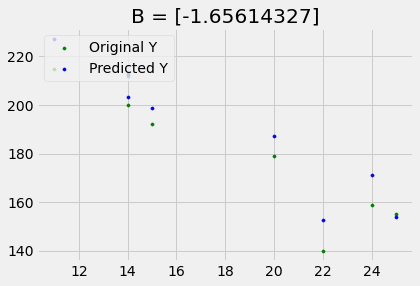

In [13]:
data = pd.read_csv('19BCE0120_multilple_linear_reg.csv')
data.head()
print(data)

X = data.iloc[:,:-1].values #importing the values from data frame
Y = data.iloc[:,-1].values

#X = np.array([[3,4,5,6,2], [8,5,7,3,1]])
#Y = np.array([-3.7, 3.5, 2.5, 11.5, 5.7])

#print("X: ", np.sum(np.multiply(X[0], X[1])))

B = findCoefficients(X,Y)
 
N = len(X[0])
a = np.mean(Y)

for i in range(N):
    a = a - B[i]*(np.mean(X[:,i]))

    
print("Estimated coefficient:a = {}\n".format(a))
for i in range(N):
    print("Estimated coefficient:B{} = {}\n".format(i, B[i]))


plotRegression(X,Y,a,B)